# Application of clustering models on air traffic passengers data

In this project we will built all machine learning models for **clustering** (shown below) using **scikit-learn**.
Our training data set contains numerical and categorical data from different operating_airlines, the to cluster them in meaningful clusters.

In this lesson you will learn about...

- **Task 1: [Importing libraries, Data Loading and Initial Exploration](#ld)**

- **Task 2: [Data cleaning](#dc)**
    - Identifying Missing Data
    - Dealing with Missing Data
    
- **Task 3: [Exploratory data analysis](#eda)**

- **Task 4: [K means clustering with elbow method](#k)**

- **Task 5: [Hierarchial clustering with dendogram](#h)**

- **Task 6: [DB scan](#d)**

#### NOTE:
This tutorial assumes that you are already know the basics of coding in **Python** and are familiar with the theory behind **K means clustering**, **Hierarchial clustering** and **DB scan** models.
Also you should be aware about **The elbow method**, **dendogram** and **K-distance graph**.

***

<a id="id"></a>
# Task 1: Importing libraries, Data Loading and Initial Exploration

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import scipy.stats as stats
# Importing models
from sklearn.cluster import k_means
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
# Importing processing functions
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import copy
import matplotlib.colors as colors
%matplotlib inline

In [2]:
# Importing the dataset
df = pd.read_csv('air_traffic_passenger_statistics.csv')
df.head()

,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,adjusted_activity_type_code,adjusted_passenger_count,year,month
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15007 entries, 0 to 15006
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   activity_period              15007 non-null  int64 
 1   operating_airline            15007 non-null  object
 2   operating_airline_iata_code  14953 non-null  object
 3   published_airline            15007 non-null  object
 4   published_airline_iata_code  14953 non-null  object
 5   geo_summary                  15007 non-null  object
 6   geo_region                   15007 non-null  object
 7   activity_type_code           15007 non-null  object
 8   price_category_code          15007 non-null  object
 9   terminal                     15007 non-null  object
 10  boarding_area                15007 non-null  object
 11  passenger_count              15007 non-null  int64 
 12  adjusted_activity_type_code  15007 non-null  object
 13  adjusted_passenger_count     15

There is 2 columns containing missing data

****

<a id="dc"></a>
# Task 2: Data cleaning 

In [4]:
# Checking missing values
df.isna().apply(pd.value_counts)

,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,adjusted_activity_type_code,adjusted_passenger_count,year,month
False,15007.0,15007.0,14953,15007.0,14953,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0,15007.0
True,NaN,NaN,54,NaN,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Removing missing data
df.dropna(axis=0,inplace=True)
df.isna().apply(pd.value_counts)

,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,adjusted_activity_type_code,adjusted_passenger_count,year,month
False,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953,14953


In [6]:
# Remove duplicates
df.drop_duplicates(inplace=True)

***

<a id="eda"></a>
# Task 3: Exploratory data analysis 

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
activity_period,14953.0,201044.583963,313.675658,200507.0,200803.0,201011.0,201308.0,201603.0
passenger_count,14953.0,29345.619006,58398.448380,1.0,5409.0,9260.0,21222.0,659837.0
adjusted_passenger_count,14953.0,29437.338862,58362.879319,1.0,5523.0,9418.0,21267.0,659837.0
year,14953.0,2010.380325,3.140994,2005.0,2008.0,2010.0,2013.0,2016.0


In [8]:
df.corr()

,activity_period,passenger_count,adjusted_passenger_count,year
activity_period,1.000000,0.061160,0.060188,0.999940
passenger_count,0.061160,1.000000,0.999941,0.060917
adjusted_passenger_count,0.060188,0.999941,1.000000,0.059946
year,0.999940,0.060917,0.059946,1.000000


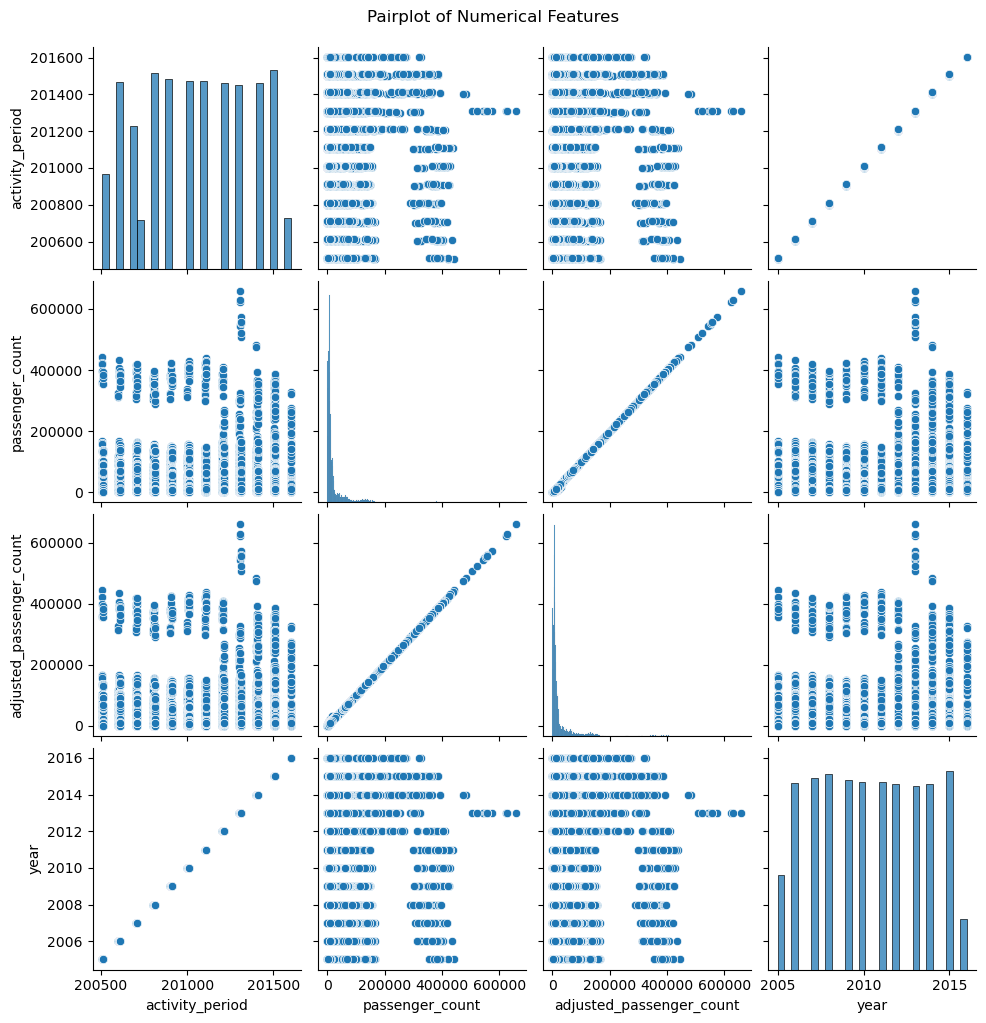

In [9]:
# Pairplot to visualize interactions between numerical features
sns.pairplot(df)
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [9]:
# Passenger Percentage
df['passenger_percentage'] = df['passenger_count'] / df.groupby('year')['passenger_count'].transform('sum')

# Season Mapping
def get_season(month_name):
    months_to_seasons = {
        'January': 'Winter', 'February': 'Winter', 'March': 'Spring',
        'April': 'Spring', 'May': 'Spring', 'June': 'Summer',
        'July': 'Summer', 'August': 'Summer', 'September': 'Fall',
        'October': 'Fall', 'November': 'Fall', 'December': 'Winter'
    }
    return months_to_seasons[month_name]

df['season'] = df['month'].apply(get_season)

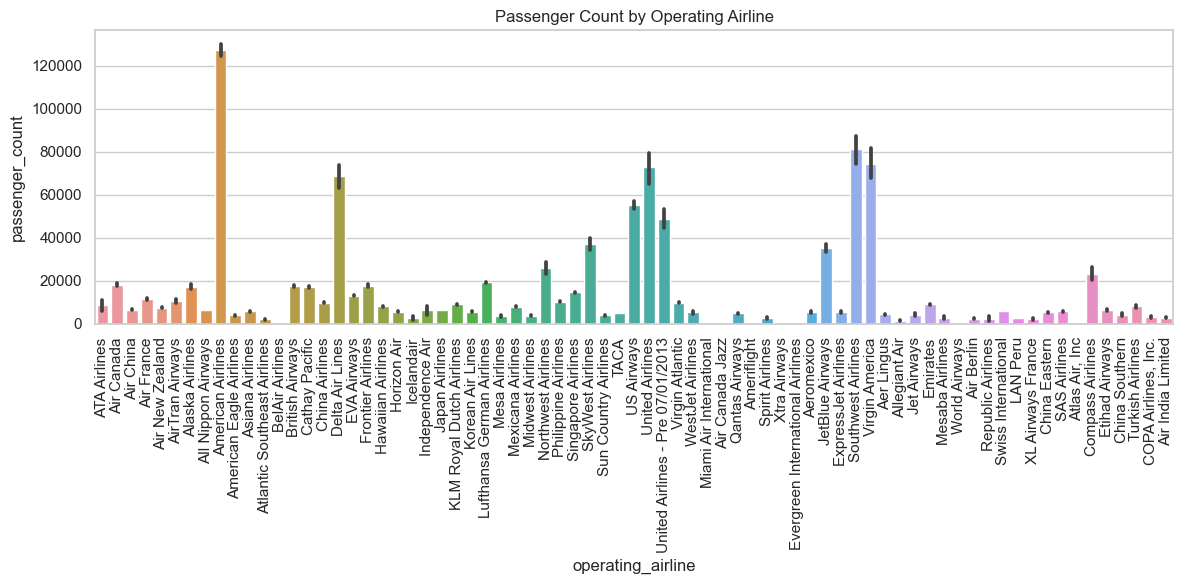

In [31]:
# Set the style for the plots
sns.set(style="whitegrid")

# Bar Plot: Passenger Count by Operating Airline
plt.figure(figsize=(12, 6))
sns.barplot(x="operating_airline", y="passenger_count", data=df)
plt.title('Passenger Count by Operating Airline')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

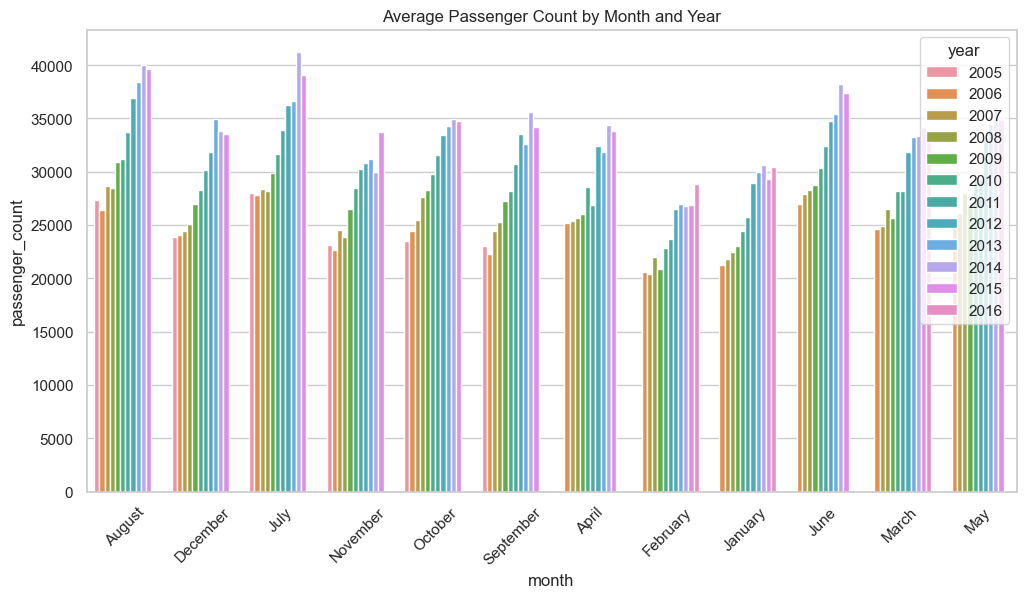

In [34]:
# Visualize average passenger count by month and year
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='passenger_count', hue='year', data=df.groupby(['year', 'month']).mean().reset_index())
plt.title('Average Passenger Count by Month and Year')
plt.xticks(rotation=45)
plt.show()

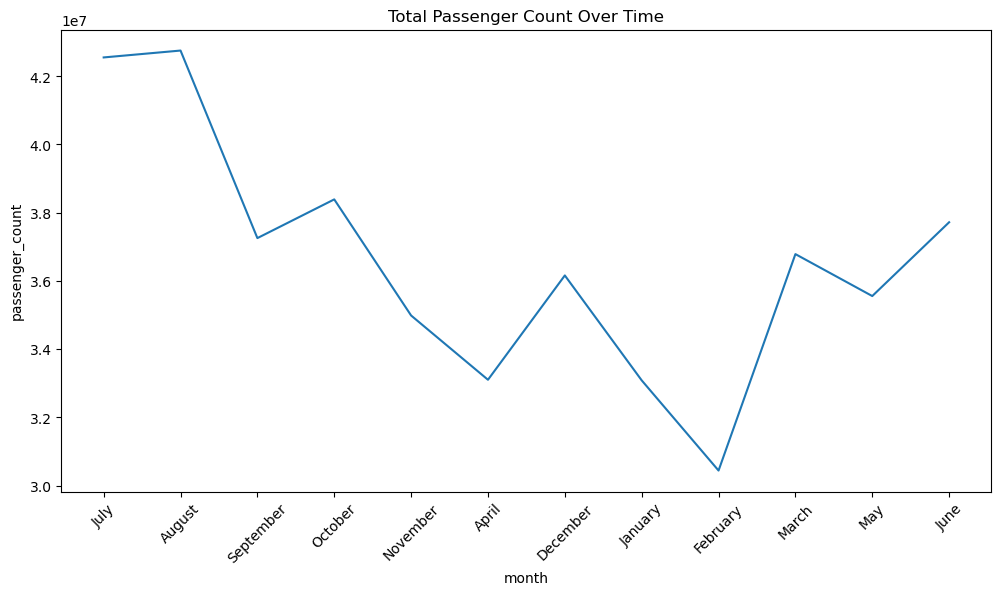

In [28]:
# Visualize passenger count over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='passenger_count', data=df, estimator='sum', ci=None)
plt.title('Total Passenger Count Over Time')
plt.xticks(rotation=45)
plt.show()

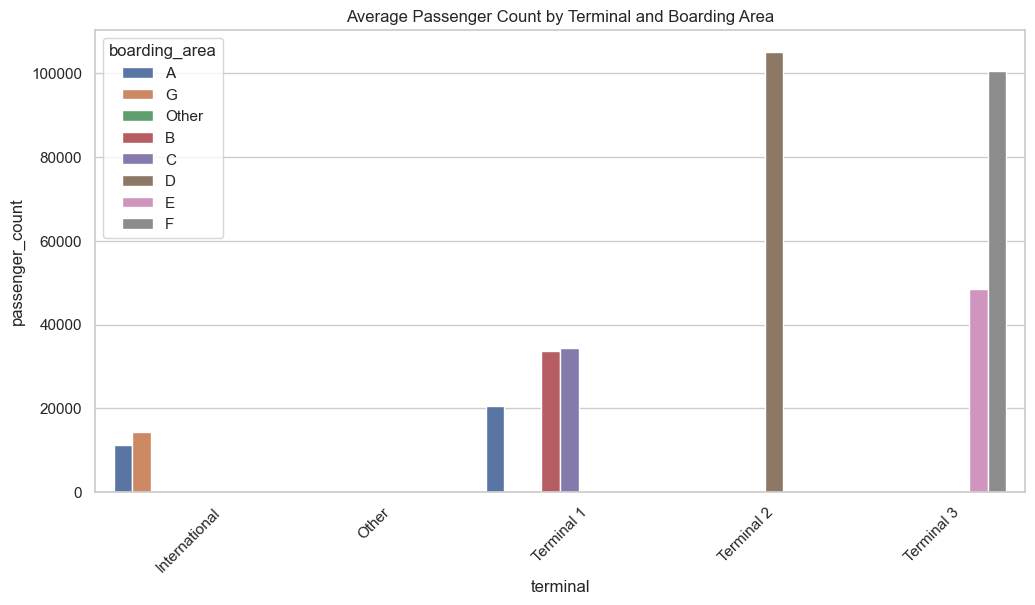

In [55]:
# Plot average passenger count by terminal and boarding area
plt.figure(figsize=(12, 6))
sns.barplot(x='terminal', y='passenger_count', hue='boarding_area', data=df.groupby(['terminal', 'boarding_area'])['passenger_count'].mean().reset_index())
plt.title('Average Passenger Count by Terminal and Boarding Area')
plt.xticks(rotation=45)
plt.show()

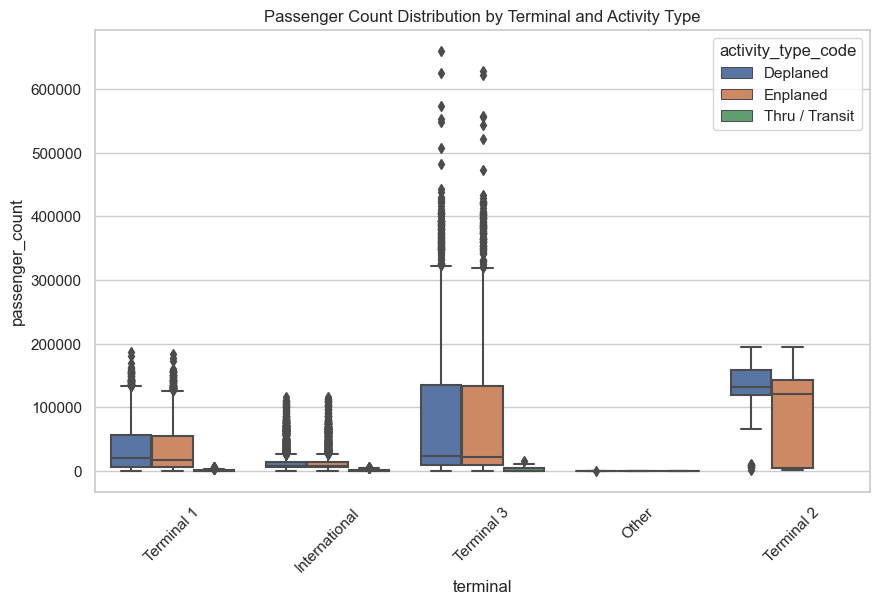

In [76]:
# Boxplot of passenger count by terminal and activity type
plt.figure(figsize=(10, 6))
sns.boxplot(x='terminal', y='passenger_count', hue='activity_type_code', data=df)
plt.title('Passenger Count Distribution by Terminal and Activity Type')
plt.xticks(rotation=45)
plt.show()

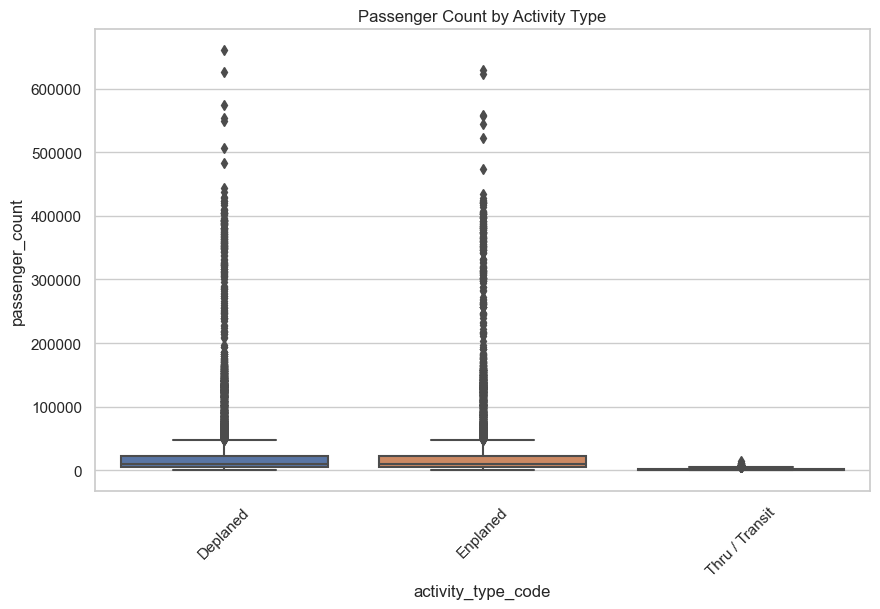

In [39]:
# Boxplot of passenger count by activity type
plt.figure(figsize=(10, 6))
sns.boxplot(x='activity_type_code', y='passenger_count', data=df)
plt.title('Passenger Count by Activity Type')
plt.xticks(rotation=45)
plt.show()

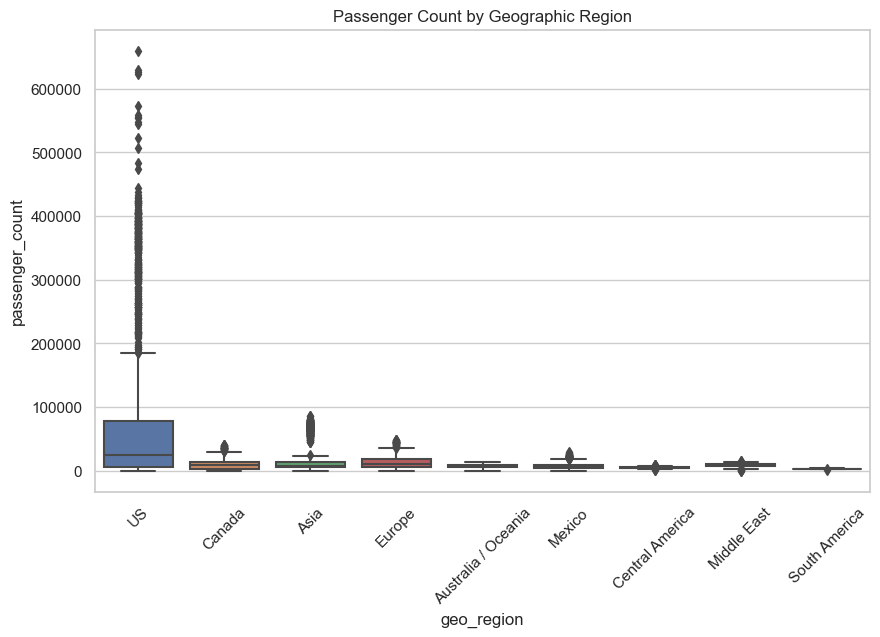

In [41]:
# Boxplot of passenger count by geo region
plt.figure(figsize=(10, 6))
sns.boxplot(x='geo_region', y='passenger_count', data=df)
plt.title('Passenger Count by Geographic Region')
plt.xticks(rotation=45)
plt.show()

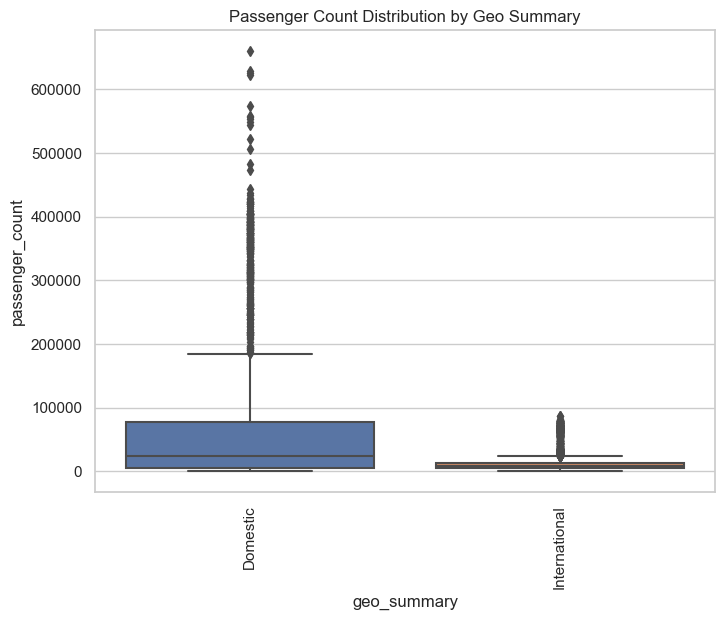

In [45]:
# Passenger count distribution by geo_summary
plt.figure(figsize=(8, 6))
sns.boxplot(x='geo_summary', y='passenger_count', data=df)
plt.title('Passenger Count Distribution by Geo Summary')
plt.xticks(rotation=90)
plt.show()

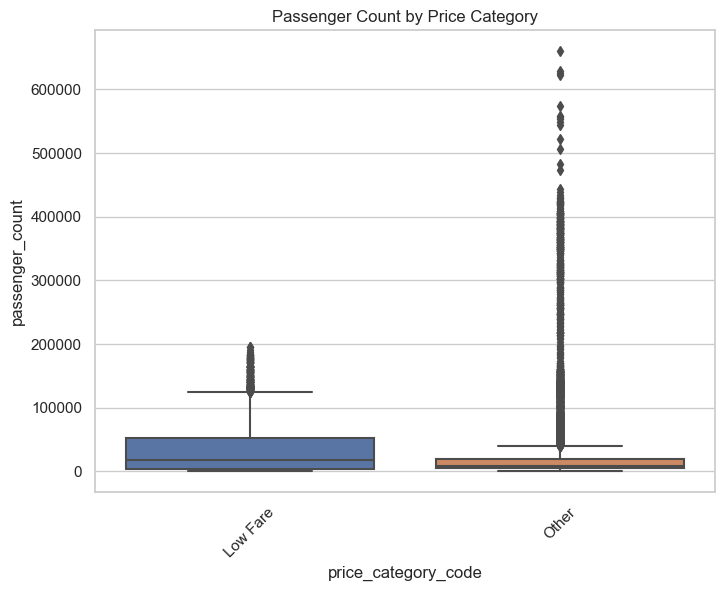

In [54]:
# Boxplot of passenger count by price category
plt.figure(figsize=(8, 6))
sns.boxplot(x='price_category_code', y='passenger_count', data=df)
plt.title('Passenger Count by Price Category')
plt.xticks(rotation=45)
plt.show()

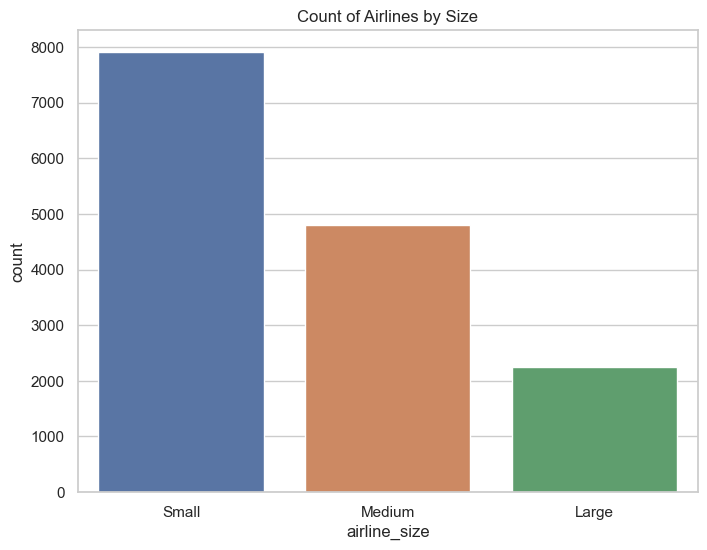

In [91]:
# Create a categorical feature for airline size based on passenger count
df['airline_size'] = pd.cut(df['passenger_count'], bins=[0, 10000, 50000, float('inf')], labels=['Small', 'Medium', 'Large'])

# Visualize the distribution of airline sizes
plt.figure(figsize=(8, 6))
sns.countplot(x='airline_size', data=df, order=['Small', 'Medium', 'Large'])
plt.title('Count of Airlines by Size')
plt.show()

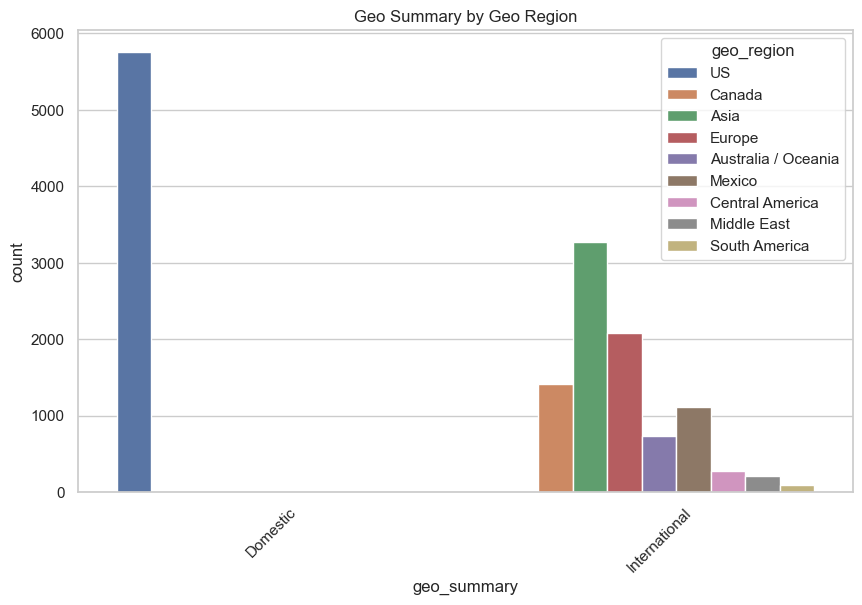

In [62]:
# Countplot of geo summary by geo region
plt.figure(figsize=(10, 6))
sns.countplot(x='geo_summary', hue='geo_region', data=df)
plt.title('Geo Summary by Geo Region')
plt.xticks(rotation=45)
plt.show()

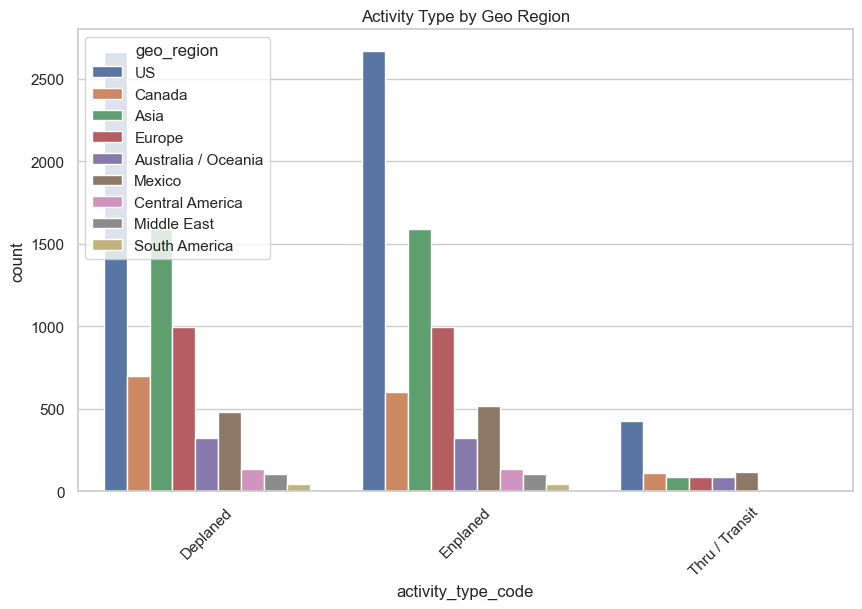

In [70]:
# Countplot of activity type by geo region
plt.figure(figsize=(10, 6))
sns.countplot(x='activity_type_code', hue='geo_region', data=df)
plt.title('Activity Type by Geo Region')
plt.xticks(rotation=45)
plt.show()

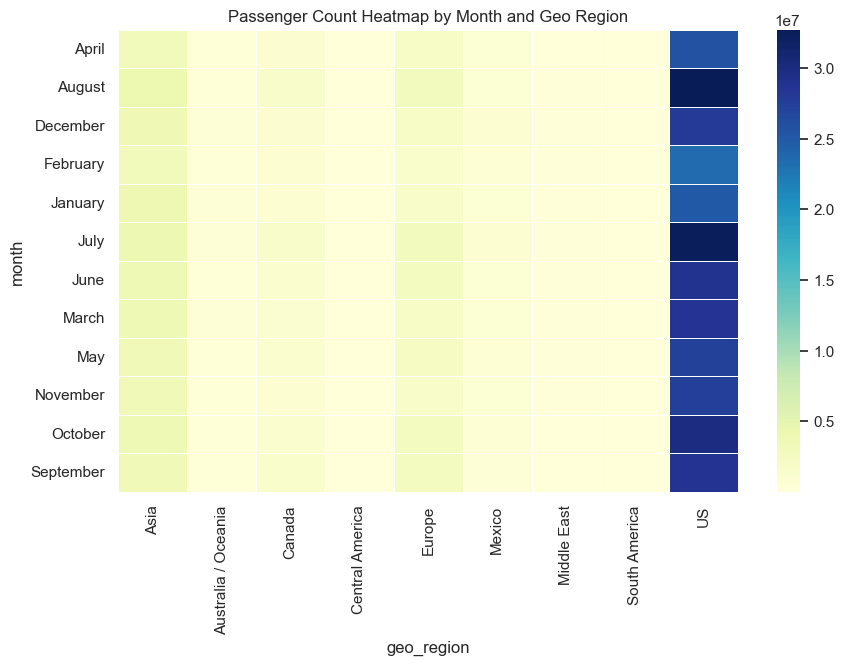

In [64]:
# Create a pivot table for heatmap visualization
heatmap_data = df.pivot_table(values='passenger_count', index='month', columns='geo_region', aggfunc='sum')

# Plot a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', fmt=".0f", linewidths=.5)
plt.title('Passenger Count Heatmap by Month and Geo Region')
plt.show()

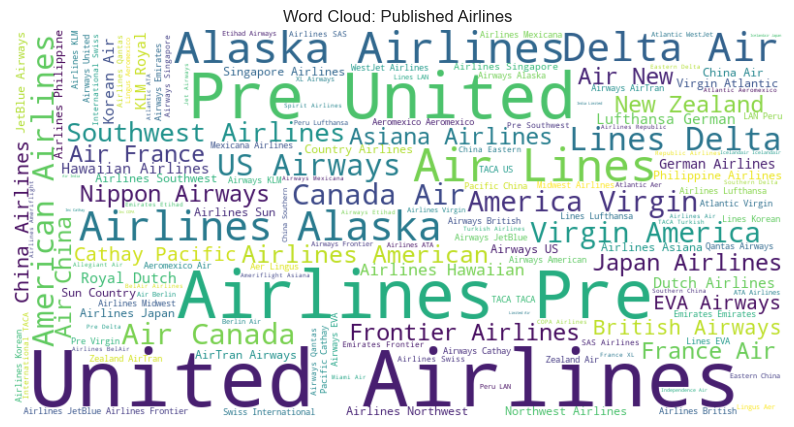

In [83]:
from wordcloud import WordCloud  # Make sure you've imported the WordCloud class

# Combine published airline names into a single string
published_airlines_text = ' '.join(df['published_airline'])  # Replace 'data' with your DataFrame name

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(published_airlines_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Published Airlines')
plt.show()

***

<a id="k"></a>
# Task 4: K means clustering with elbow method

In [92]:
df.head()

,activity_period,operating_airline,operating_airline_iata_code,published_airline,published_airline_iata_code,geo_summary,geo_region,activity_type_code,price_category_code,terminal,boarding_area,passenger_count,adjusted_activity_type_code,adjusted_passenger_count,year,month,airline_size,passenger_percentage,season
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,Deplaned,27271,2005,July,Medium,0.001583,Summer
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,Enplaned,29131,2005,July,Medium,0.001691,Summer
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,Thru / Transit * 2,10830,2005,July,Small,0.000314,Summer
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,Deplaned,35156,2005,July,Medium,0.002041,Summer
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,Enplaned,34090,2005,July,Medium,0.001979,Summer


In [11]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans

# Select features for clustering
selected_features = ['adjusted_passenger_count', 'year']

# Extract the selected features
X = df[selected_features]

# Scale the features
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [10]:
X = df.iloc[:, [13, 14]].values

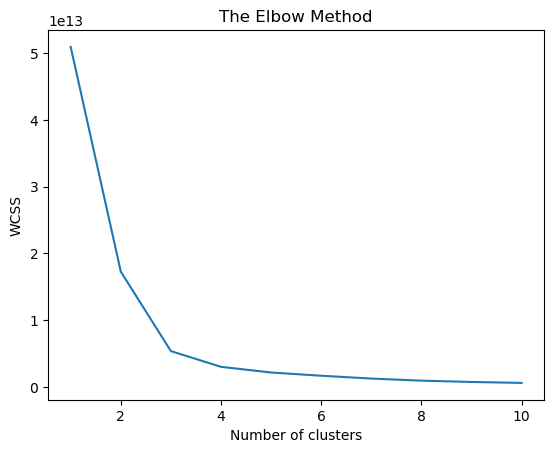

In [11]:
# Draw the elpow graph
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

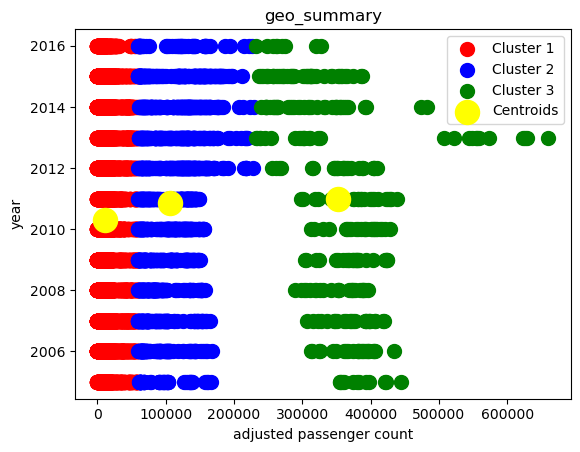

In [13]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('geo_summary')
plt.xlabel('adjusted passenger count')
plt.ylabel('year')
plt.legend()
plt.show()

***

<a id="h"></a>
# Task 5: Hierarchial clustering with dendogram

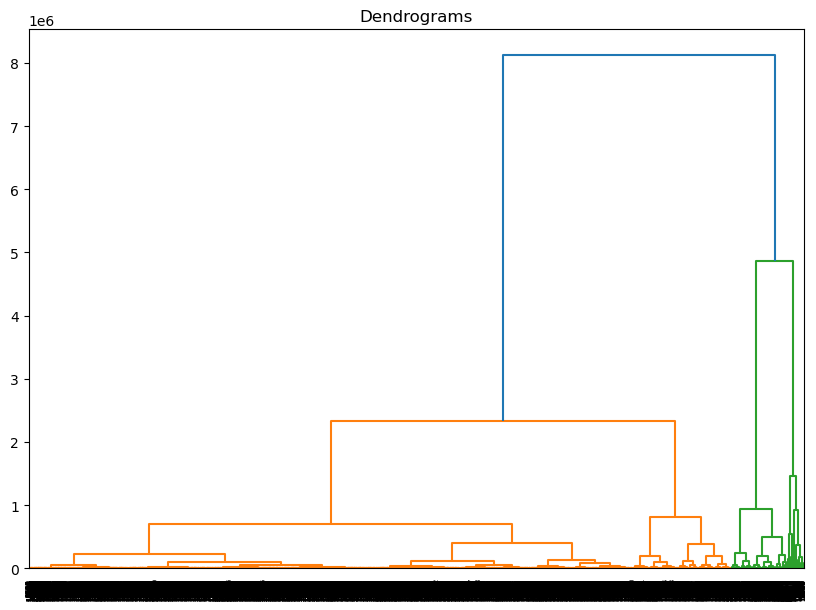

In [14]:
# Draw the dendrogram to choose the best numper of clusters
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

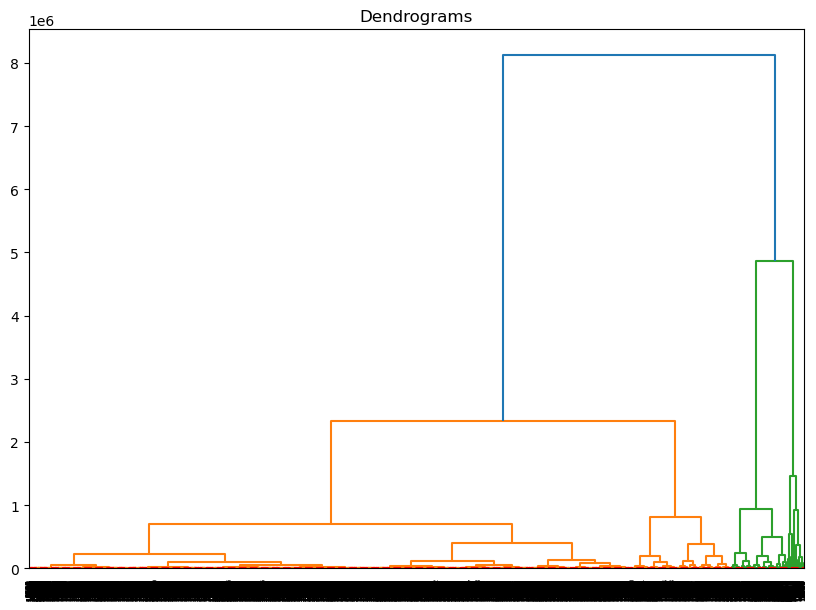

In [15]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

Text(0.5, 1.0, 'Hierarchical')

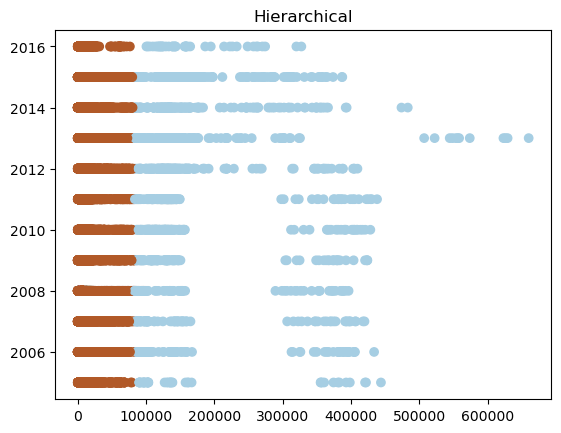

In [16]:
hier = AgglomerativeClustering(n_clusters=2)
y_pred2 = hier.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred2, cmap='Paired')
plt.title("Hierarchical")

***

<a id="d"></a>
# Task 6: DB scan

In [17]:
# Draw k-distance graph to choose the best Eps
from sklearn.neighbors import NearestNeighbors 

In [18]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)

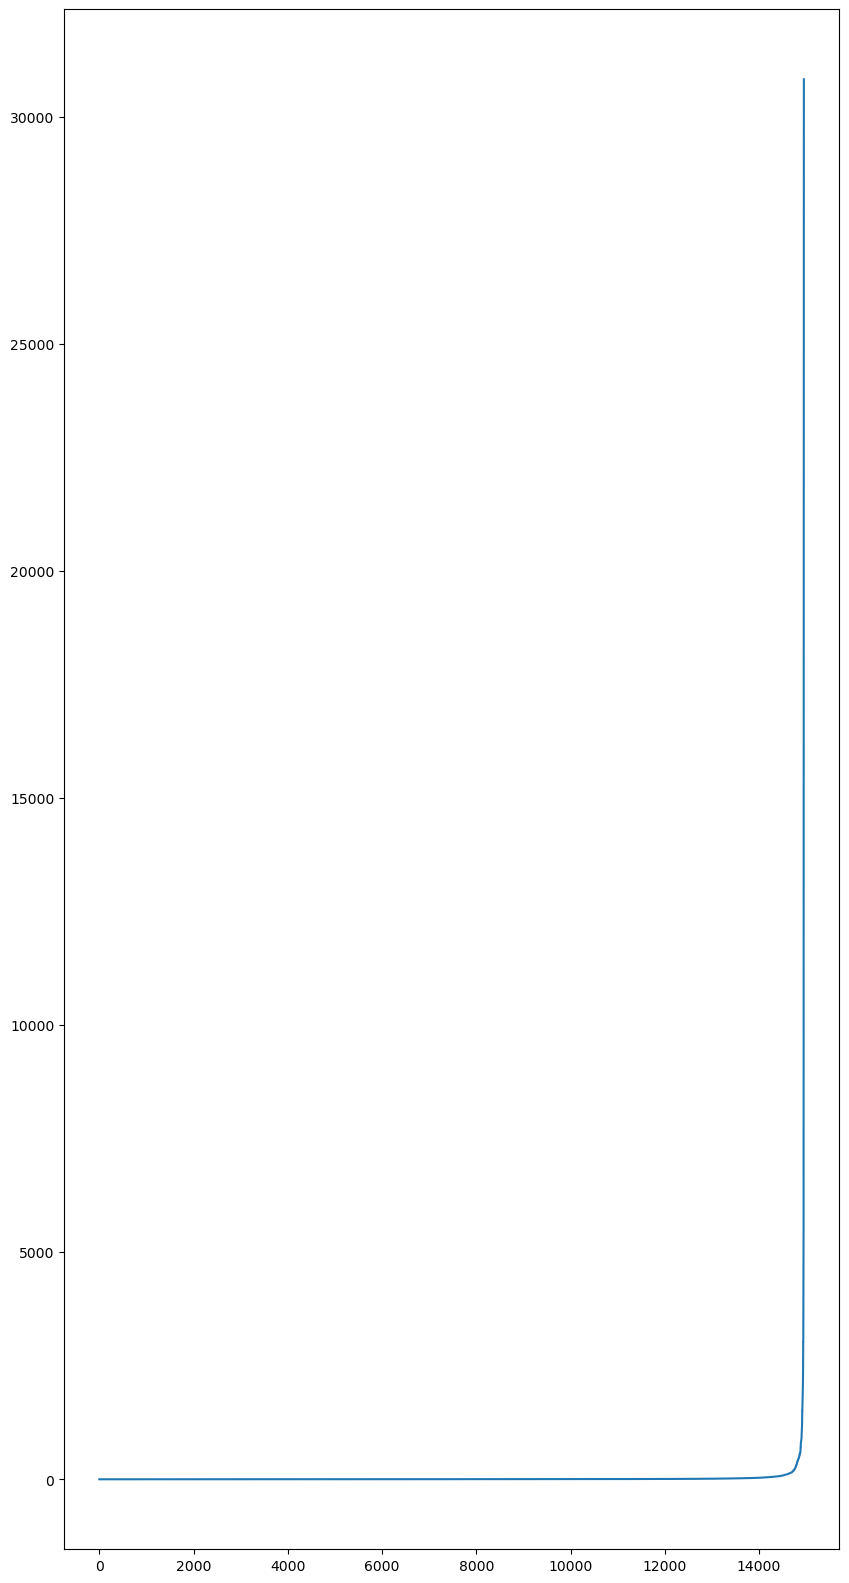

In [19]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10, 20))  
plt.plot(distances)

Text(0.5, 1.0, 'DBSCAN')

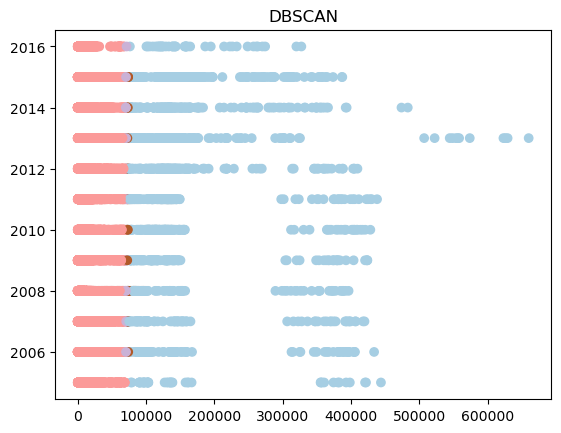

In [20]:
db = DBSCAN(eps=1000, min_samples=50)
db.fit(X)
y_pred3 = db.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred3, cmap='Paired')
plt.title("DBSCAN")

Text(0.5, 1.0, 'DBSCAN')

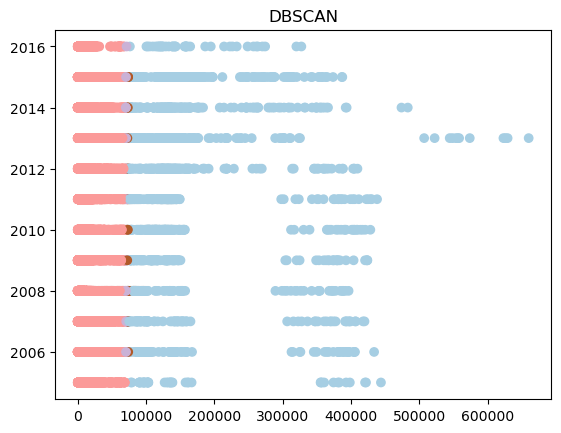

In [21]:

db = DBSCAN(eps=1000, min_samples=50)
db.fit(X)
y_pred3 = db.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred3, cmap='Paired')
plt.title("DBSCAN")